In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = "imdb_top_1000.csv"
df = pd.read_csv(file_path)

## Data Preprocessing(Data Cleaning and Data Transformation)

In [4]:
df.shape

(1000, 16)

In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
df.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [7]:
df['Certificate'].value_counts

<bound method IndexOpsMixin.value_counts of 0           A
1           A
2          UA
3           A
4           U
        ...  
995         A
996         G
997    Passed
998       NaN
999       NaN
Name: Certificate, Length: 1000, dtype: object>

In [8]:
movies = df[['Poster_Link', 'Series_Title', 'Genre', 'IMDB_Rating', 'Director','Overview','Star1', 'Star2', 'Star3', 'No_of_Votes', 'Gross']]

In [9]:
movies.sample(3)

,Poster_Link,Series_Title,Genre,IMDB_Rating,Director,Overview,Star1,Star2,Star3,No_of_Votes,Gross
130,https://m.media-amazon.com/images/M/MV5BZDNlNz...,K.G.F: Chapter 1,"Action, Drama",8.2,Prashanth Neel,"In the 1970s, a fierce rebel rises against bru...",Yash,Srinidhi Shetty,Ramachandra Raju,36680,NaN
828,https://m.media-amazon.com/images/M/MV5BMDhiOT...,Who Framed Roger Rabbit,"Animation, Adventure, Comedy",7.7,Robert Zemeckis,A toon-hating detective is a cartoon rabbit's ...,Bob Hoskins,Christopher Lloyd,Joanna Cassidy,182009,"156,452,370"
182,https://m.media-amazon.com/images/M/MV5BNDc2OD...,Judgment at Nuremberg,"Drama, War",8.2,Stanley Kramer,"In 1948, an American court in occupied Germany...",Spencer Tracy,Burt Lancaster,Richard Widmark,69458,NaN


In [10]:
movies.isnull().sum()

Poster_Link       0
Series_Title      0
Genre             0
IMDB_Rating       0
Director          0
Overview          0
Star1             0
Star2             0
Star3             0
No_of_Votes       0
Gross           169
dtype: int64

In [11]:
movies = movies.fillna(method='pad')

C:\Users\presh\AppData\Local\Temp\ipykernel_9640\614302501.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  movies = movies.fillna(method='pad')


In [12]:
movies.isnull().sum()

Poster_Link     0
Series_Title    0
Genre           0
IMDB_Rating     0
Director        0
Overview        0
Star1           0
Star2           0
Star3           0
No_of_Votes     0
Gross           0
dtype: int64

In [13]:
movies.duplicated().sum()

0

In [14]:
movies.dtypes

Poster_Link      object
Series_Title     object
Genre            object
IMDB_Rating     float64
Director         object
Overview         object
Star1            object
Star2            object
Star3            object
No_of_Votes       int64
Gross            object
dtype: object

In [15]:
movies.head(2)

,Poster_Link,Series_Title,Genre,IMDB_Rating,Director,Overview,Star1,Star2,Star3,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,Drama,9.3,Frank Darabont,Two imprisoned men bond over a number of years...,Tim Robbins,Morgan Freeman,Bob Gunton,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"Crime, Drama",9.2,Francis Ford Coppola,An organized crime dynasty's aging patriarch t...,Marlon Brando,Al Pacino,James Caan,1620367,"134,966,411"


In [16]:
movies['Poster_Link']

0      https://m.media-amazon.com/images/M/MV5BMDFkYT...
1      https://m.media-amazon.com/images/M/MV5BM2MyNj...
2      https://m.media-amazon.com/images/M/MV5BMTMxNT...
3      https://m.media-amazon.com/images/M/MV5BMWMwMG...
4      https://m.media-amazon.com/images/M/MV5BMWU4N2...
                             ...                        
995    https://m.media-amazon.com/images/M/MV5BNGEwMT...
996    https://m.media-amazon.com/images/M/MV5BODk3Yj...
997    https://m.media-amazon.com/images/M/MV5BM2U3Yz...
998    https://m.media-amazon.com/images/M/MV5BZTBmMj...
999    https://m.media-amazon.com/images/M/MV5BMTY5OD...
Name: Poster_Link, Length: 1000, dtype: object

## Data Visualization

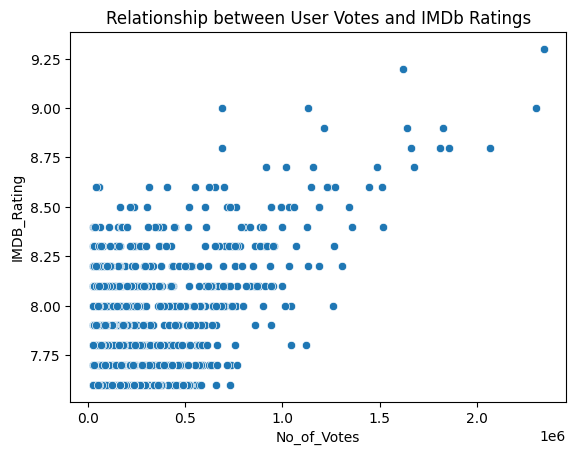

In [17]:
sns.scatterplot(x='No_of_Votes', y='IMDB_Rating', data=movies)
plt.title('Relationship between User Votes and IMDb Ratings')
plt.show()

C:\Users\presh\AppData\Local\Temp\ipykernel_9640\3621738274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies_imdb, palette='Blues_r')


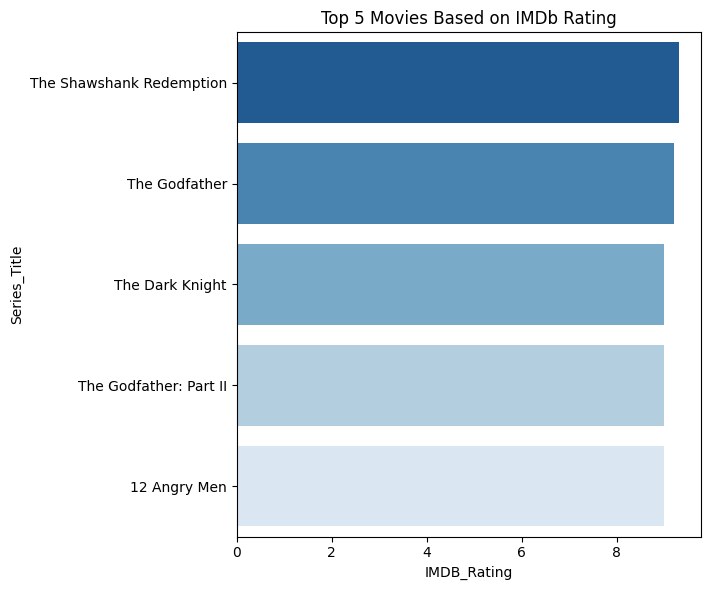

In [18]:
top_movies_imdb = movies.sort_values(by='IMDB_Rating', ascending=False).head(5)


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.barplot(x='IMDB_Rating', y='Series_Title', data=top_movies_imdb, palette='Blues_r')
plt.title('Top 5 Movies Based on IMDb Rating')


plt.tight_layout()
plt.show()

In [19]:
movies['Genre'] = movies['Genre'].apply(lambda x: x.replace(" ", ""))
movies['Director'] = movies['Director'].apply(lambda x: x.replace(" ", ""))
movies['Star1'] = movies['Star1'].apply(lambda x: x.replace(" ", ""))
movies['Star2'] = movies['Star2'].apply(lambda x: x.replace(" ", ""))
movies['Star3'] = movies['Star3'].apply(lambda x: x.replace(" ", ""))

In [20]:
movies.head(2)

,Poster_Link,Series_Title,Genre,IMDB_Rating,Director,Overview,Star1,Star2,Star3,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,Drama,9.3,FrankDarabont,Two imprisoned men bond over a number of years...,TimRobbins,MorganFreeman,BobGunton,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,"Crime,Drama",9.2,FrancisFordCoppola,An organized crime dynasty's aging patriarch t...,MarlonBrando,AlPacino,JamesCaan,1620367,"134,966,411"


In [21]:
movies['tags'] = movies['Genre'] + movies['Overview']+ movies['Director'] + movies['Star1'] + movies['Star2'] + movies['Star3']

In [22]:
movies = movies[['Poster_Link','Series_Title', 'IMDB_Rating', 'tags','No_of_Votes','Gross']]

In [23]:
movies.head(2)

,Poster_Link,Series_Title,IMDB_Rating,tags,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,9.3,DramaTwo imprisoned men bond over a number of ...,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,9.2,"Crime,DramaAn organized crime dynasty's aging ...",1620367,"134,966,411"


In [24]:
movies.dtypes

Poster_Link      object
Series_Title     object
IMDB_Rating     float64
tags             object
No_of_Votes       int64
Gross            object
dtype: object

In [25]:
movies['tags']= movies['tags'].apply(lambda x:x.lower())

## Stemming

In [26]:
import nltk

In [27]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [28]:
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [29]:
movies['tags'][0]

'dramatwo imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.frankdarabonttimrobbinsmorganfreemanbobgunton'

In [30]:
stem('dramatwo imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.frankdarabonttimrobbinsmorganfreemanbobgunton')

'dramatwo imprison men bond over a number of years, find solac and eventu redempt through act of common decency.frankdarabonttimrobbinsmorganfreemanbobgunton'

In [31]:
movies['tags'] = movies['tags'].apply(stem)

In [32]:
## Vectorization

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000, stop_words='english')

In [34]:
vectors = cv.fit_transform(movies['tags']).toarray()

In [35]:
cv.get_feature_names_out()

array(['00', '000', '007', ..., 'zulu',
       'çaganirmakçetintekindorfikretkuskanhümeyra', 'édith'],
      dtype=object)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

In [37]:
cosine_similarity(vectors).shape

(1000, 1000)

In [38]:
similarity = cosine_similarity(vectors)

In [39]:
similarity[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       0.070014  , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0745356 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06804138, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06299408,
       0.        , 0.        , 0.        , 0.13245324, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [40]:
def recommend(movie):
    movie_index = movies[movies['Series_Title']== movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse = True, key = lambda x:x[1])[1:6]

    for i in movies_list:
        print(movies.iloc[i[0]].Series_Title)


In [41]:
recommend('The Shawshank Redemption')

Down by Law
La Grande Illusion
Oldeuboi
Fa yeung nin wah
The Sting


In [42]:
recommend('The Lion King')

Hamlet
Haider
The Ten Commandments
Wreck-It Ralph
Cat on a Hot Tin Roof


In [43]:
import pickle

In [44]:
pickle.dump(movies.to_dict(),open('movie_dict.pkl','wb'))

In [45]:
pickle.dump(similarity,open('similarity.pkl','wb'))